In [20]:
import numpy as np
import scipy.stats
from  scipy.stats import beta

In [21]:
group_size = 1000
A_group = np.random.rand(group_size)
B_group = np.random.rand(group_size) 

In [22]:
A_successes= sum(A_group < 0.15)
B_successes= sum(B_group < 0.20)


In [23]:
A_failiur = group_size - A_successes
B_failiur = group_size - B_successes


In [24]:
A_post = beta(A_successes + 8 , A_failiur + 42 )
B_post = beta(B_successes + 8 , B_failiur + 42 ) 

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

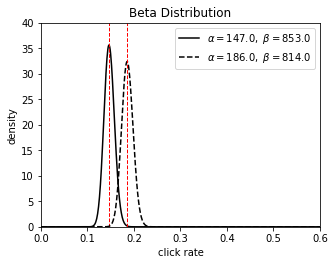

In [26]:
alpha_values = [A_successes,B_successes]
beta_values = [A_failiur,B_failiur ]
linestyles = ['-', '--', ':', '-.']
x = np.linspace(0, 1, 1002)[1:-1]

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for a, b, ls in zip(alpha_values, beta_values, linestyles):
    dist = beta(a, b)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\alpha=%.1f,\ \beta=%.1f$' % (a, b))
    
    plt.axvline(dist.mean(), color='r', linestyle='dashed', linewidth=1)


plt.xlim(0, 0.6)
plt.ylim(0, 40)

plt.xlabel('click rate')
plt.ylabel(r'density')
plt.title('Beta Distribution')



plt.legend(loc=0)
plt.show()

In [27]:
n_trials = 100000
A_sample= pd.Series([A_post.rvs() for i in range(n_trials)])
B_sample= pd.Series([B_post.rvs() for i in range(n_trials)])
B_wins=sum(B_sample>A_sample)
B_wins/n_trials

0.98886